# The first steep to this project is to complete a hypothesis. When looking at this project we need to look at the sales of the store and determine what may be the factors that may cause the number of sales to change.

The factors I predict causing a change in sales will be both internal and external factors.
External Factors:
*   Population of the surrounding area
*   Proximity to other competitive stores
*   Type of City or location within the city
*   Marketing of the store
*   Economic/ Market Conditions
*   The Season and time of year
*   Customer Preferences

Internal factors:

*   Product Assortment
*   Store Layout
*   Product Location
*   Type of Products
*  Shopping Experience




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BigMart_test.csv to BigMart_test.csv
Saving BigMart_train.csv to BigMart_train.csv


In [ ]:
#Data Exploration Phase

import pandas as pd
import numpy as np

#Lead the training and testing data sets and print the data sets
train = pd.read_csv("BigMart_train.csv")
test = pd.read_csv("BigMart_test.csv")
#Add a source column to tell us which data set the points are from
train['source']='BigMart_train'
test['source']='BigMart_test'
#Combine the traininging and testing data sets to make cleaning the data one process
data = pd.concat([train, test],ignore_index=True)
print(train.head())
print(test.head())
print(train.shape, test.shape, data.shape)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [ ]:
#looking for missing data in the data sets
data.apply(lambda x: sum(x.isnull()))

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [ ]:
print(data.apply(lambda x: sum(x.isnull())))


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


In [ ]:
#break down the statistics of the data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Check the number of unique values in each column
data.apply(lambda x: len(x.unique()))

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,13006
Item_Type,16
Item_MRP,8052
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


In [ ]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Frequency of Categories for varible Item_Type
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

Frequency of Categories for varible Outlet_Size
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name

In [ ]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull()

#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x].values[0])
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [ ]:
#Import mode function:
from scipy.stats import mode

# Create a function to apply np.unique to find the mode
def unique_mode(x):
  unique_elements, counts = np.unique(x.astype(str), return_counts=True)
  mode_index = np.argmax(counts)
  return unique_elements[mode_index]

# Group data by 'Outlet_Type' and apply the unique_mode function
outlet_size_mode = data.groupby('Outlet_Type')['Outlet_Size'].agg(unique_mode)
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull()

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(data['Outlet_Size'].isnull()))



Mode for each Outlet_Type:
Outlet_Type
Grocery Store           nan
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

Orignal #missing: 4016
0


In [ ]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [ ]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x].values[0])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [ ]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [ ]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

,count
Item_Type_Combined,
Food,10201
Non-Consumable,2686
Drinks,1317


In [ ]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

,Outlet_Years
count,14204.000000
mean,15.169319
std,8.371664
min,4.000000
25%,9.000000
50%,14.000000
75%,26.000000
max,28.000000


In [ ]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Modified Categories:
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64


In [ ]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,6499
Regular,5019
Non-Edible,2686


In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [ ]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [ ]:
data.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Item_Outlet_Sales,float64
source,object
Item_Visibility_MeanRatio,float64


In [ ]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,True,False,False
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False
5,False,False,True
6,False,False,True
7,True,False,False
8,False,False,True
9,False,False,True


In [ ]:
print(data.head())

  Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.017834  Fruits and Vegetables   
4           NCD19         8.93         0.009780              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0  249.8092            OUT049                       1999          3735.1380   
1   48.2692            OUT018                       2009           443.4228   
2  141.6180            OUT049                       1999          2097.2700   
3  182.0950            OUT010                       1998           732.3800   
4   53.8614            OUT013                       1987           994.7052   

          source  Item_Visibility_MeanRatio  ...  Outlet_0  Outlet_1  \
0  BigMa

In [ ]:
data = data.replace({True: 1, False: 0})

<ipython-input-23-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [ ]:
print(data.head())

  Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.017834  Fruits and Vegetables   
4           NCD19         8.93         0.009780              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0  249.8092            OUT049                       1999          3735.1380   
1   48.2692            OUT018                       2009           443.4228   
2  141.6180            OUT049                       1999          2097.2700   
3  182.0950            OUT010                       1998           732.3800   
4   53.8614            OUT013                       1987           994.7052   

          source  Item_Visibility_MeanRatio  ...  Outlet_0  Outlet_1  \
0  BigMa

In [ ]:
from sklearn.model_selection import train_test_split
#Divide into test and train:
train, test = train_test_split(data, test_size=0.3, random_state=42)

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)

In [ ]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

<ipython-input-73-2644ae00b0c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['Item_Outlet_Sales'] = mean_sales


In [ ]:
print(mean_sales)

2182.838469303956


In [ ]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.impute import SimpleImputer
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    """

    Args:
      alg:
      dtrain:
      dtest:
      predictors:
      target:
      IDcol:
      filename:
    """

   # Create an imputer object with strategy 'mean'
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the target variable of the training data
    imputer.fit(dtrain[[target]])

    # Transform the target variable in both training and testing data
    dtrain[target] = imputer.transform(dtrain[[target]])
    dtest[target] = imputer.transform(dtest[[target]])

    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])

   #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error') # Changed to cross_val_score
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model report:
    print ("Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

Model Report
RMSE : 1078
CV Score : Mean - 1078 | Std - 61.28 | Min - 939.1 | Max - 1175


<Axes: title={'center': 'Model Coefficients'}>

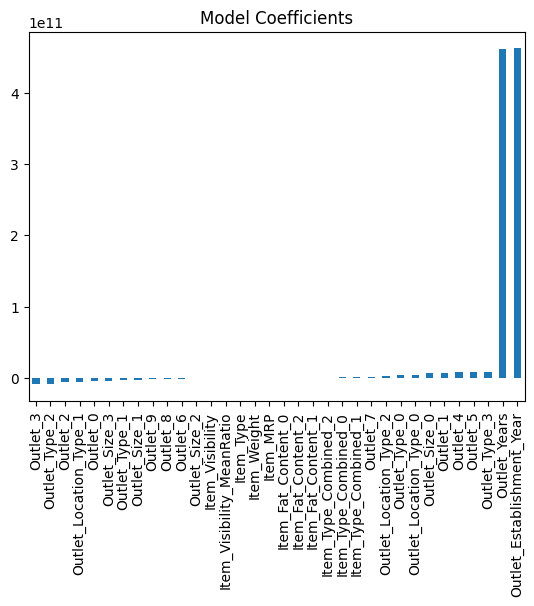

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression()

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in predictors
for column in predictors:
    # Check if the column contains string values
    if train[column].dtype == 'object':
        # Fit the encoder to the unique values in the column
        le.fit(train[column].unique())
        # Transform the column in both train and test dataframes
        train[column] = le.transform(train[column])
        test[column] = le.transform(test[column])

modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

Model Report
RMSE : 1045
CV Score : Mean - 1076 | Std - 59.93 | Min - 932.6 | Max - 1163


<Axes: title={'center': 'Feature Importances'}>

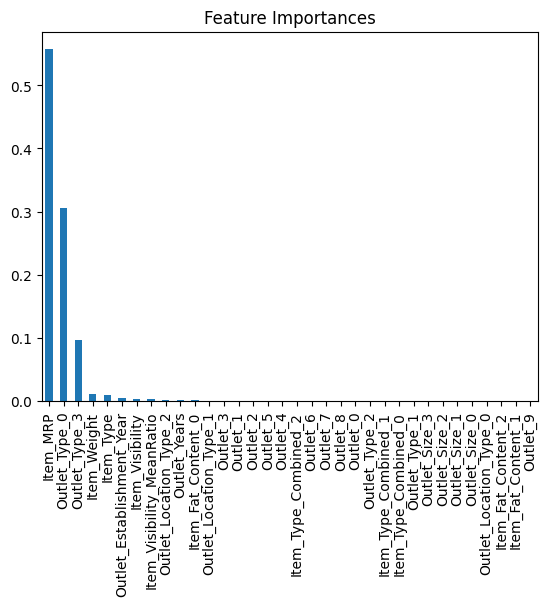

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

Model Report
RMSE : 1055
CV Score : Mean - 1067 | Std - 54.43 | Min - 946.9 | Max - 1155


<Axes: title={'center': 'Feature Importances'}>

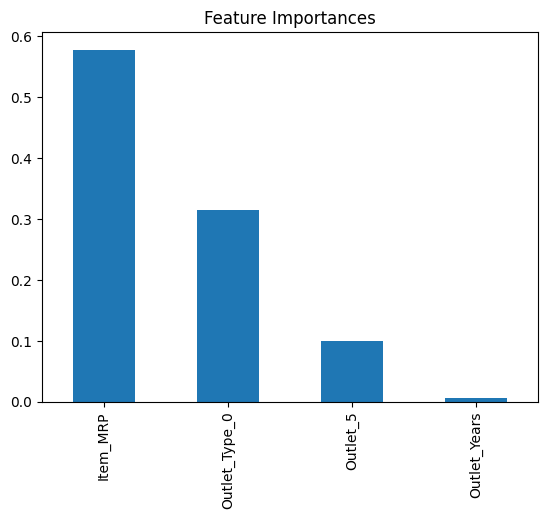

In [ ]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

Model Report
RMSE : 1055
CV Score : Mean - 1064 | Std - 55.87 | Min - 932.3 | Max - 1150


<Axes: title={'center': 'Feature Importances'}>

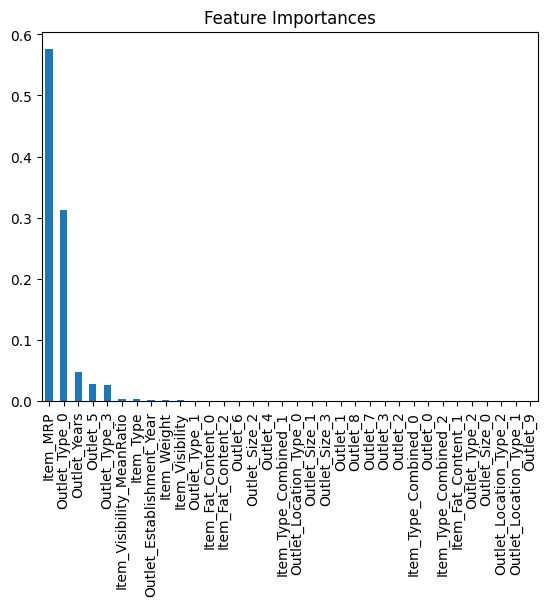

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

Model Report
RMSE : 976.4
CV Score : Mean - 1074 | Std - 56.67 | Min - 950 | Max - 1158


<Axes: title={'center': 'Feature Importances'}>

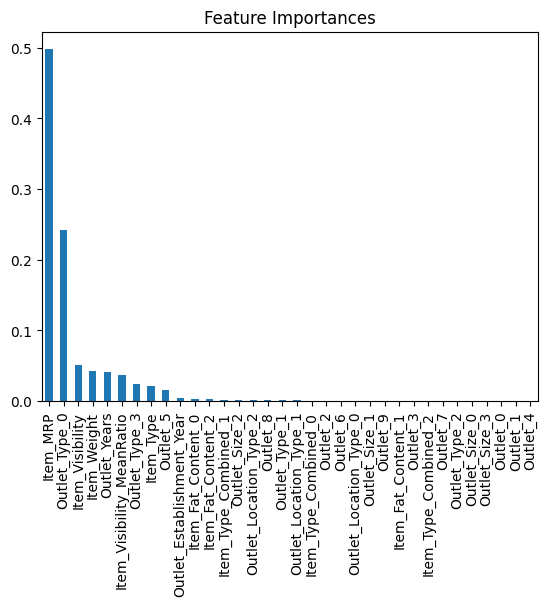

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=100,max_depth=9, min_samples_leaf=10,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

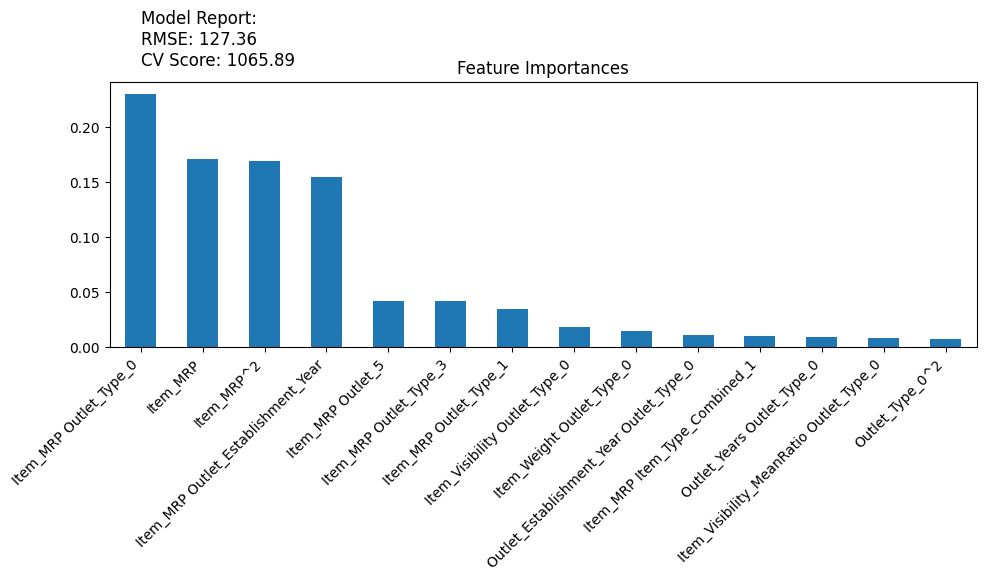

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define target and ID columns
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

# Create a PolynomialFeatures object with the desired degree
poly = PolynomialFeatures(degree=2)

# Select predictors
predictors = [x for x in train.columns if x not in [target]+IDcol]

# Transform the predictor columns in the training data
X_train_poly = poly.fit_transform(train[predictors])

# Get the feature names after transformation
poly_feature_names = poly.get_feature_names_out(predictors)

# Create and train the Random Forest model
alg7 = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4)
alg7.fit(X_train_poly, train[target])

# Transform the predictor columns in the test data
X_test_poly = poly.transform(test[predictors])

# Make predictions
predictions = alg7.predict(X_test_poly)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': predictions
})
submission.to_csv('alg7.csv', index=False)

# Feature importances (use poly_feature_names)
coef7 = pd.Series(alg7.feature_importances_, poly_feature_names).sort_values(ascending=False)
top_n = 14
coef7 = coef7.head(top_n)

# Calculate RMSE
predictions = alg7.predict(X_test_poly)  # Assuming X_test_poly is your test data with polynomial features
rmse = np.sqrt(mean_squared_error(test[target], predictions))

# Calculate CV score
cv_scores = cross_val_score(alg7, X_train_poly, train[target], cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(np.mean(cv_scores)))

# Create the feature importance plot
plt.figure(figsize=(10, 6))
coef7.plot(kind='bar', title='Feature Importances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add model report as text annotation
report_text = f"Model Report:\nRMSE: {rmse:.2f}\nCV Score: {cv_score:.2f}"
plt.text(0, coef7.max() * 1.1, report_text, fontsize=12, va='bottom')  # Adjust position as needed

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Calculate RMSE
predictions = alg7.predict(X_test_poly)
rmse = np.sqrt(metrics.mean_squared_error(test[target], predictions))

# Calculate CV score
cv_scores = cross_val_score(alg7, X_train_poly, train[target], cv=5, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(np.mean(cv_scores)))

print("RMSE:", rmse)
print("CV Score:", cv_score)

RMSE: 63.534377759657225
CV Score: 1065.5447654537056


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# Define predictors based on important features from previous models
predictors = ['Item_MRP', 'Outlet_Type_0', 'Outlet_5', 'Outlet_Years',
              'Item_Visibility', 'Outlet_Type_3']

# Create and train the GBM model
alg_gbm = GradientBoostingRegressor(n_estimators=400, learning_rate=0.3, max_depth=3, random_state=20)
alg_gbm.fit(train[predictors], train[target])

# Predict on the test data
predictions_gbm = alg_gbm.predict(test[predictors])


    Model Report:
    -------------
    Algorithm: GradientBoostingRegressor
    RMSE: 63.53
    CV Score: 1065.54
    


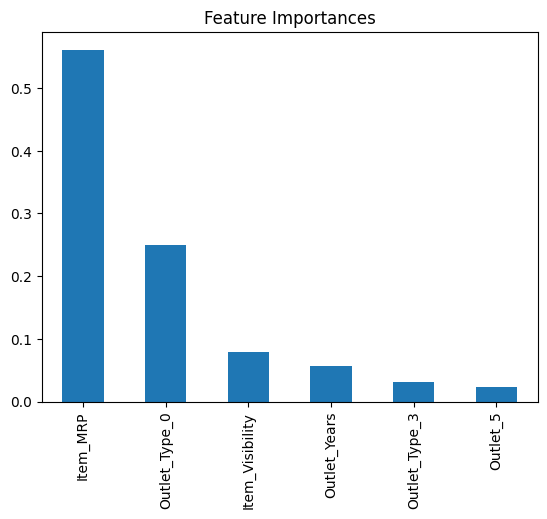

In [ ]:
# Feature importances
coef_gbm = pd.Series(alg_gbm.feature_importances_, predictors).sort_values(ascending=False)
coef_gbm.plot(kind='bar', title='Feature Importances')
report = f"""
    Model Report:
    -------------
    Algorithm: {type(alg_gbm).__name__}
    RMSE: {rmse:.2f}
    CV Score: {cv_score:.2f}
    """
print(report)

In [ ]:
# Calculate RMSE
predictions_gbm = alg_gbm.predict(test[predictors])
rmse_gbm = np.sqrt(metrics.mean_squared_error(test[target], predictions_gbm))

# Calculate CV score
cv_scores_gbm = cross_val_score(alg_gbm, train[predictors], train[target], cv=5, scoring='neg_mean_squared_error')
cv_score_gbm = np.sqrt(np.abs(np.mean(cv_scores_gbm)))

print("RMSE:", rmse_gbm)
print("CV Score:", cv_score_gbm)

RMSE: 356.1361638426434
CV Score: 1143.3023839760203
